<a href="https://colab.research.google.com/github/Intertangler/ML4biotech/blob/main/cb206v_exercise2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## example - sampling from exponential distribution inverse CDF
Below we use a random number generator to fetch data from an exponential distribution. We do this using the CDF expression (which monotonically relates a unique value of the random variable X to a number between 0 and 1 (probability). If we rearrange it to solve for X, feeding in a random number conversely gives us a unique sampled value of X for every random number between 0 and 1 that we generate. This can be used to simulate processes governed by an exponential distribution - for example molecular binding kinetics.  

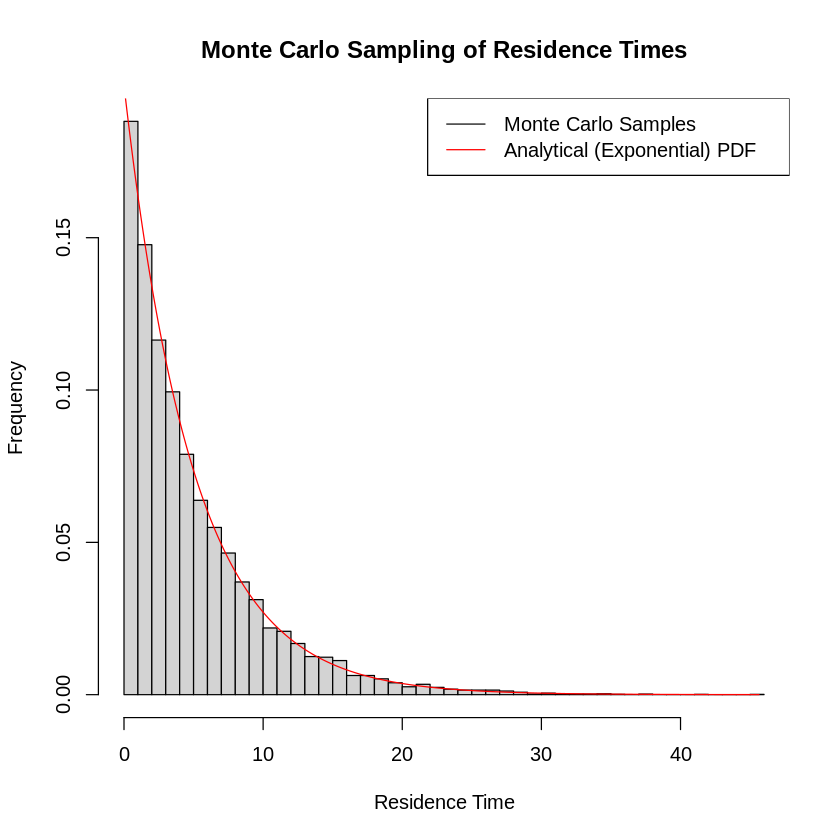

In [1]:
# first we set the rate parameter (lambda)
lambda_rate <- 0.2
n_samples <- 10000
u <- runif(n_samples, 0, 1)# next we generate uniform random numbers between 0 and 1
tau <- -log(1 - u) / lambda_rate# we use the inverse CDF to calculate the corresponding residence times (tau)
hist(tau, breaks=50, probability=TRUE, main='Monte Carlo Sampling of Residence Times', # now we plot the histogram of the Monte Carlo samples
     xlab='Residence Time', ylab='Frequency')
x <- seq(min(tau), max(tau), length.out=1000)# here we generate the x values for plotting the analytical PDF
pdf <- lambda_rate * exp(-lambda_rate * x)# we calculate the analytical PDF (Exponential)
lines(x, pdf, col="red")# finally, we add the analytical PDF to the histogram
legend("topright", legend=c("Monte Carlo Samples", "Analytical (Exponential) PDF"),
       col=c("black", "red"), lty=1)


## Exercise 1: Monte Carlo Simulation of UMI Cut Events




Imagine we have a sequencing-based low copy-number detection experiment (e.g. a qPCR experiment) in which we are utilizing random nucleotide sequences to tag molecules, also known as unique molecular identifiers (UMI). In our experiment, a restriction enzyme HaeIII is used in one of the steps which specifically cuts sequences containing the "GGCC" sequence. An unintended consequence of this may be that UMI's that, by chance, contain "GGCC" will inadvertently be cut as well. In our experiment, let us suppose that if a certain number of UMI's get cut, e.g. 5, then this critical threshold will disrupt the experiment. So, we want to know how many UMI's (trials) are needed to trigger the 5-cut event. Simulate the process of sampling random DNA sequences (UMIs) until encountering 5 events (successes) where the sequence "GGCC" occurs. Use Monte Carlo simulation to mimic the data generated by this process.

Initialize variables: Set up a counter for the number of trials (UMIs read) and the number of successes (UMIs containing "GGCC").

Simulation Loop: Run a loop where in each iteration:

Generate a 20-nucleotide long UMI where each nucleotide has a 25% chance to be either 'A', 'T', 'C', or 'G'.
Check if the UMI contains the sequence "GGCC". If yes, increment the success counter.
Continue until you have 5 successes, and then record the number of trials needed.
Repeat the Simulation: Perform the above simulation many times (e.g., 1000 times) to get a distribution of the number of trials needed for 5 successes. Finally, take the resulting data and compile it into a histogram and plot it to visualize the distribution of number of UMI's needed to encounter 5 successes. How does the shape of this distribution change when you play with the number of required successes?


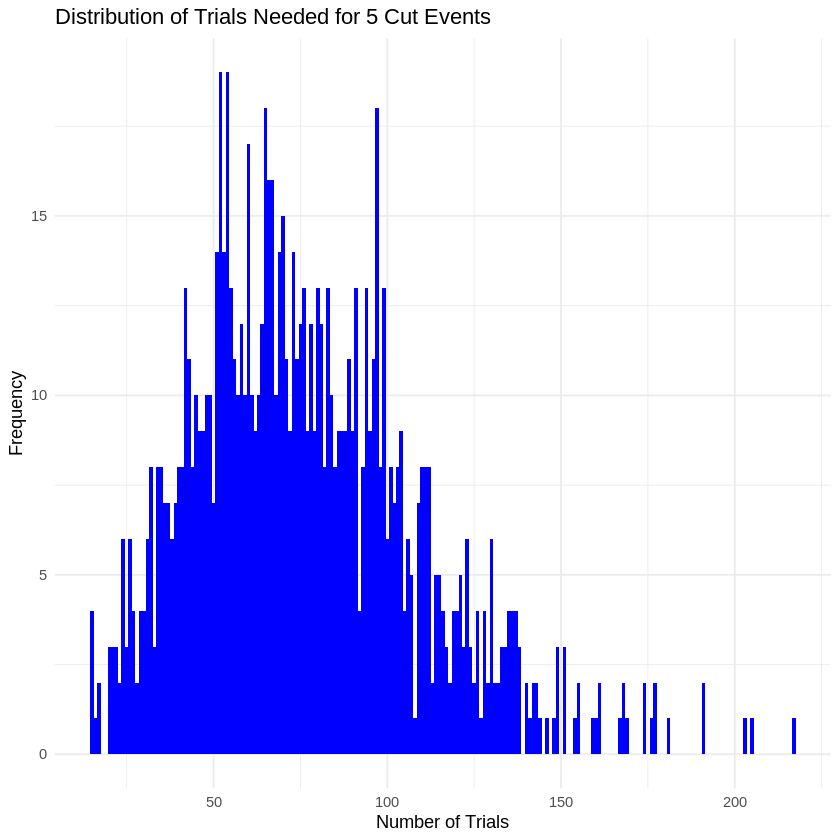

In [7]:
library(ggplot2)
# Initialize placeholder variables
n_simulations <- 1000
results <- numeric()
r_successes <- 5

# Monte Carlo sampling part
for (i in 1:n_simulations) {
  n_trials <- 0
  n_success <- 0
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
  results <- c(results, n_trials)
}

# Plotting the histogram
ggplot(data.frame(results), aes(x=results)) +
  geom_histogram(binwidth=1, fill="blue") +
  labs(x='Number of Trials', y='Frequency',
       title=paste('Distribution of Trials Needed for', r_successes, 'Cut Events')) +
  theme_minimal()


## Exercise 2: Fitting Data with Maximum Likelihood Estimation (MLE)





Now imagine a situation where we did not actually generate the data.  In this fictional scenario, let us suppose that we know that when a critical number of UMI's are damaged, it results in cross-talk sufficient to cause an error in our PCR-based detection experiment. By systematically varying the number of UMI's in the experiment, we are able to observe rates of experiment failure. We guess that this may be due to the restriction enzyme we are using, and its random chance to encounter its recognition site. Further research reveals that we could model such a process with a negative binomial distribution, where the number of cuts corresponds to r successes, the number of UMI's used corresponds to k trials, and p is the probability of any single UMI having the sequence. To investigate the hypothesis, we will fit the negative binomial distribution to the data from exercise 1.

Fit the data generated in Exercise 1 to the analytical form of the Negative Binomial distribution using Maximum Likelihood Estimation (MLE).

Calculate the Empirical Probability: From the simulated data, estimate the probability

p of encountering a "GGCC" in a UMI. = Total Successes/Total Trials

MLE for Negative Binomial: Implement the Maximum Likelihood Estimation to fit the Negative Binomial distribution to the data.

Compare the Estimated and Simulated Data: Plot the simulated data and the fitted Negative Binomial distribution to see how well they match.

[1] "Fitted parameters: r = 4.54663053057632 , p = 0.0596652722821109"


Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


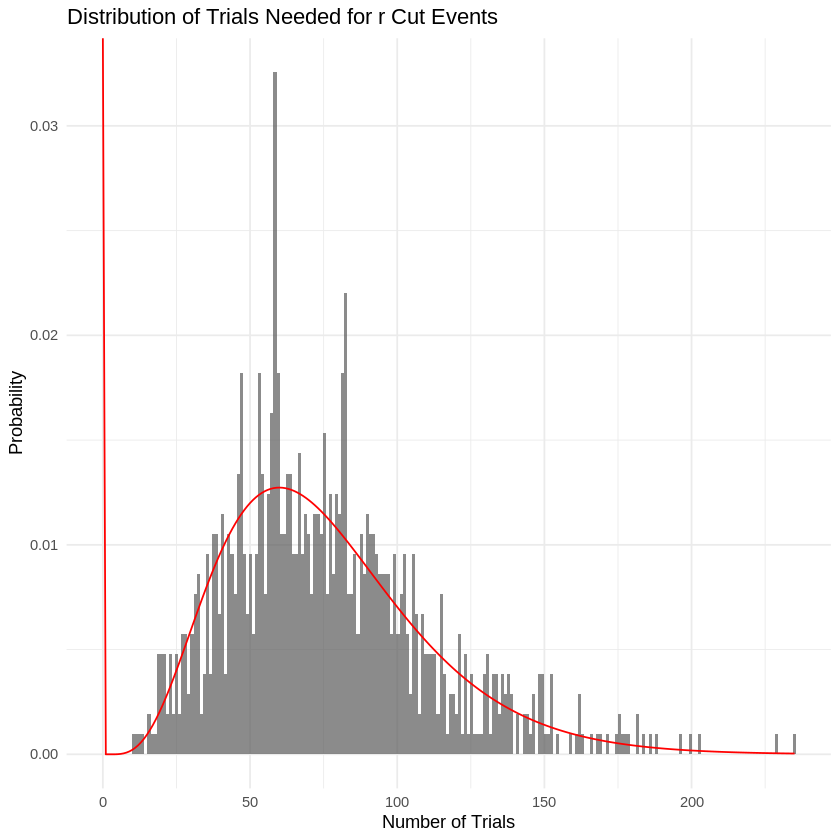

In [5]:
library(ggplot2)
results <- as.integer(scan("https://raw.githubusercontent.com/Intertangler/ML4biotech/main/monte_carlo_simulation_results.txt", what=""))

# Debugging versions of the functions
neg_binomial_pmf <- function(k, r, p) {
  log_pmf <- lgamma(k) - lgamma(r) - lgamma(k - r + 1) + r * log(p) + (k - r) * log(1 - p)
  return(exp(log_pmf))
}

nll <- function(params) {
  r <- params[1]
  p <- params[2]
  log_likelihood <- 0
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
 #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
}
# Initial parameter guesses
initial_guess <- c(2, 0.01)  # Start from a low p value

# Optimization using optim()
result <- optim(par = initial_guess, fn = nll, method = "L-BFGS-B",
                lower = c(0.0001, 0.0001),
                upper = c(Inf, 1.0), control = list(maxit = 10000))

# Extract fitted parameters
fitted_r <- result$par[1]
fitted_p <- result$par[2]

print(paste("Fitted parameters: r =", fitted_r, ", p =", fitted_p))

# Plotting histogram and fitted distribution
data <- data.frame(x = 0:max(results))
data$prob <- sapply(data$x, function(k) neg_binomial_pmf(k, fitted_r, fitted_p))
results_df <- data.frame(trials = results)
ggplot(data = results_df, aes(x = trials)) +
  geom_histogram(bins = max(results) - min(results) + 1, alpha = 0.7, aes(y = ..density..)) +
  geom_line(data = data, aes(x = x, y = prob), color = "red") +
  labs(x = "Number of Trials", y = "Probability", title = "Distribution of Trials Needed for r Cut Events") +
  theme_minimal()


In [6]:
# we will need the 'MASS' package for the Negative Binomial distribution and 'stats' for chi-square
if (!requireNamespace("MASS", quietly = TRUE)) install.packages("MASS")
if (!requireNamespace("stats", quietly = TRUE)) install.packages("stats")

library(MASS)
library(stats)

# first we generate the observed frequencies from the simulated data
observed_freq <- hist(results, breaks=seq(min(results), max(results) + 1, by=1), plot=FALSE)$counts

# next we generate the expected frequencies using the fitted Negative Binomial model
x_values <- seq(min(results), max(results), by=1)
expected_freq <- sapply(x_values, function(k) n_simulations * dnbinom(k, size=fitted_r, prob=fitted_p))

# now we remove bins where the expected frequency is zero (or very small)
non_zero_indices <- which(expected_freq > 5)
observed_freq <- observed_freq[non_zero_indices]
expected_freq <- expected_freq[non_zero_indices]

# let's normalize the expected frequencies so they sum to the same total as the observed frequencies
total_observed <- sum(observed_freq)
total_expected <- sum(expected_freq)
scaling_factor <- total_observed / total_expected
expected_freq <- expected_freq * scaling_factor

# we perform the Chi-Square Goodness-of-Fit Test
chi_square_test <- chisq.test(x=observed_freq, p=expected_freq/sum(expected_freq), rescale.p=TRUE)

# finally, we print the chi-square statistic and p-value
cat("Chi-Square Statistic:", chi_square_test$statistic, "\nP-Value:", chi_square_test$p.value, "\n")


Chi-Square Statistic: 90.20024 
P-Value: 0.2759658 
